## Create the figures used in Stochastic Variance Reduced Gradient Plug-and-Play Methods for Solving Image Reconnstruction Problems

In [1]:
%matplotlib notebook

from imports import *

print('cuda' if torch.cuda.is_available() else 'cpu')

cuda


# Figures 1 + 2: Compare Image Fidelity for Different Algorithms and Compare PSNR over time using NLM

In [2]:
main_problem = create_problem('./data/Set12/13.png', H=256, W=256, sigma=5)

In [3]:
z_SVRG, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(main_problem, 'nlm', eta=2000, tt=200, T2=30, mini_batch_size=1000, verbose=True)

After gradient update: 0 0 17.92991608035559
After denoising update: 0 0 17.956364690113855

After gradient update: 0 1 18.10301836193956
After denoising update: 0 1 18.129880334394734

After gradient update: 0 2 18.273511067131878
After denoising update: 0 2 18.29804410397934

After gradient update: 0 3 18.433191826708125
After denoising update: 0 3 18.453960482065966

After gradient update: 0 4 18.581566417656873
After denoising update: 0 4 18.598863075328676

After gradient update: 0 5 18.723135681508406
After denoising update: 0 5 18.737923277291042

After gradient update: 0 6 18.69179784029313
After denoising update: 0 6 18.70534963104919

After gradient update: 0 7 18.49727810037832
After denoising update: 0 7 18.5096825226475

After gradient update: 0 8 18.62831167171478
After denoising update: 0 8 18.64026367153278

After gradient update: 0 9 18.773292860911152
After denoising update: 0 9 18.783843475230075

After gradient update: 0 10 18.914112667948263
After denoising update:

After denoising update: 2 27 22.51480677992928

After gradient update: 2 28 22.556929375079196
After denoising update: 2 28 22.538972968836667

After gradient update: 2 29 22.57431006369531
After denoising update: 2 29 22.55660335647617

After gradient update: 3 0 22.596589537246903
After denoising update: 3 0 22.57691020652706

After gradient update: 3 1 22.61648513848881
After denoising update: 3 1 22.596664102056074

After gradient update: 3 2 22.636135342430084
After denoising update: 3 2 22.6162770467559

After gradient update: 3 3 22.653495010715112
After denoising update: 3 3 22.633525517172565

After gradient update: 3 4 22.672217753833586
After denoising update: 3 4 22.6523917485384

After gradient update: 3 5 22.683916953324605
After denoising update: 3 5 22.663896560109173

After gradient update: 3 6 22.70184520469991
After denoising update: 3 6 22.681909261643188

After gradient update: 3 7 22.715949773496984
After denoising update: 3 7 22.696017092191312

After gradient up

After denoising update: 5 24 23.5484556483908

After gradient update: 5 25 23.57700625447987
After denoising update: 5 25 23.55644309635632

After gradient update: 5 26 23.584533988425047
After denoising update: 5 26 23.56392958225428

After gradient update: 5 27 23.590617680712455
After denoising update: 5 27 23.570309588637638

After gradient update: 5 28 23.598267631878315
After denoising update: 5 28 23.578806131899206

After gradient update: 5 29 23.606475823945175
After denoising update: 5 29 23.586652072246327

After gradient update: 6 0 23.61510557340957
After denoising update: 6 0 23.5947191687896

After gradient update: 6 1 23.6230895632969
After denoising update: 6 1 23.602802867265993

After gradient update: 6 2 23.630985396710376
After denoising update: 6 2 23.610758606935637

After gradient update: 6 3 23.638836219679767
After denoising update: 6 3 23.618718551523493

After gradient update: 6 4 23.64666088426955
After denoising update: 6 4 23.626600114223045

After gradie

After denoising update: 8 21 24.12651854518316

After gradient update: 8 22 24.14926474688205
After denoising update: 8 22 24.130969152618206

After gradient update: 8 23 24.153881024375888
After denoising update: 8 23 24.135721249558443

After gradient update: 8 24 24.159119893794756
After denoising update: 8 24 24.140692679252894

After gradient update: 8 25 24.163039939520907
After denoising update: 8 25 24.144605338257623

After gradient update: 8 26 24.16741787327251
After denoising update: 8 26 24.149122808218948

After gradient update: 8 27 24.171501997544574
After denoising update: 8 27 24.153427255858322

After gradient update: 8 28 24.17613076672517
After denoising update: 8 28 24.157682653272662

After gradient update: 8 29 24.18007508348869
After denoising update: 8 29 24.162110732253197

After gradient update: 9 0 24.184815635084398
After denoising update: 9 0 24.166648655519573

After gradient update: 9 1 24.189277058722446
After denoising update: 9 1 24.171130823997807



After gradient update: 11 18 24.459207687235995
After denoising update: 11 18 24.443787037812612

After gradient update: 11 19 24.461848952718004
After denoising update: 11 19 24.446514327316926

After gradient update: 11 20 24.464570614224243
After denoising update: 11 20 24.449400038405052

After gradient update: 11 21 24.467316672581106
After denoising update: 11 21 24.45208000415424

After gradient update: 11 22 24.469883268632714
After denoising update: 11 22 24.45478795117208

After gradient update: 11 23 24.472597529885668
After denoising update: 11 23 24.45762029957171

After gradient update: 11 24 24.47543221607745
After denoising update: 11 24 24.46039907134573

After gradient update: 11 25 24.478391656978097
After denoising update: 11 25 24.46316983164536

After gradient update: 11 26 24.481003671252118
After denoising update: 11 26 24.46591750475731

After gradient update: 11 27 24.483602353182313
After denoising update: 11 27 24.468626534776266

After gradient update: 11 2

After denoising update: 14 13 24.652342877116737

After gradient update: 14 14 24.666553856238696
After denoising update: 14 14 24.65475907642118

After gradient update: 14 15 24.668906667799206
After denoising update: 14 15 24.6570673917015

After gradient update: 14 16 24.671241470081974
After denoising update: 14 16 24.659454066891687

After gradient update: 14 17 24.673546546046193
After denoising update: 14 17 24.66187862626424

After gradient update: 14 18 24.675844525913124
After denoising update: 14 18 24.664164213717275

After gradient update: 14 19 24.67821584633502
After denoising update: 14 19 24.666556511079648

After gradient update: 14 20 24.680591483515514
After denoising update: 14 20 24.66886696617145

After gradient update: 14 21 24.68274009802444
After denoising update: 14 21 24.671197562563293

After gradient update: 14 22 24.68502555079047
After denoising update: 14 22 24.673455884197566

After gradient update: 14 23 24.687210210144535
After denoising update: 14 2

After denoising update: 17 9 24.83242029701939

After gradient update: 17 10 24.843291590538136
After denoising update: 17 10 24.834293464424665

After gradient update: 17 11 24.845173095745025
After denoising update: 17 11 24.836186263533342

After gradient update: 17 12 24.8469302780701
After denoising update: 17 12 24.8380130810444

After gradient update: 17 13 24.848731214833556
After denoising update: 17 13 24.83983394225831

After gradient update: 17 14 24.8505196284939
After denoising update: 17 14 24.841601987643017

After gradient update: 17 15 24.85226650903647
After denoising update: 17 15 24.843430035473844

After gradient update: 17 16 24.85395618691384
After denoising update: 17 16 24.84511713660476

After gradient update: 17 17 24.855643338439517
After denoising update: 17 17 24.84694471116207

After gradient update: 17 18 24.8575123331366
After denoising update: 17 18 24.848785698636092

After gradient update: 17 19 24.859401777142004
After denoising update: 17 19 24.85

After denoising update: 20 4 24.976163451086624

After gradient update: 20 5 24.984273013558884
After denoising update: 20 5 24.977708538176202

After gradient update: 20 6 24.98579863045142
After denoising update: 20 6 24.979254512686907

After gradient update: 20 7 24.98733321273423
After denoising update: 20 7 24.980822736820155

After gradient update: 20 8 24.988851343576485
After denoising update: 20 8 24.98237978980613

After gradient update: 20 9 24.990385907233627
After denoising update: 20 9 24.98393654509894

After gradient update: 20 10 24.99191808300705
After denoising update: 20 10 24.985524470533967

After gradient update: 20 11 24.993459264709657
After denoising update: 20 11 24.987076450921727

After gradient update: 20 12 24.994999911031638
After denoising update: 20 12 24.988617102304474

After gradient update: 20 13 24.996491172277977
After denoising update: 20 13 24.99014529545528

After gradient update: 20 14 24.997937826187563
After denoising update: 20 14 24.9916

After gradient update: 23 0 25.11713925527399
After denoising update: 23 0 25.11271867927093

After gradient update: 23 1 25.1187241519278
After denoising update: 23 1 25.114321167592326

After gradient update: 23 2 25.120317998889842
After denoising update: 23 2 25.115931375728376

After gradient update: 23 3 25.12190136389016
After denoising update: 23 3 25.117532435985556

After gradient update: 23 4 25.123492183929752
After denoising update: 23 4 25.119136590949097

After gradient update: 23 5 25.125062718905493
After denoising update: 23 5 25.120724673637934

After gradient update: 23 6 25.126650834532235
After denoising update: 23 6 25.122325385706098

After gradient update: 23 7 25.12822054896551
After denoising update: 23 7 25.12391939687983

After gradient update: 23 8 25.129815009824746
After denoising update: 23 8 25.125529851948272

After gradient update: 23 9 25.13141176337719
After denoising update: 23 9 25.12714444582029

After gradient update: 23 10 25.132990979723125
A

After denoising update: 25 25 25.241812792375583

After gradient update: 25 26 25.246346304141788
After denoising update: 25 26 25.243213439908743

After gradient update: 25 27 25.24773781457476
After denoising update: 25 27 25.244604106961134

After gradient update: 25 28 25.24913994990845
After denoising update: 25 28 25.246022524752746

After gradient update: 25 29 25.250523441860672
After denoising update: 25 29 25.24743915813508

After gradient update: 26 0 25.251926401009896
After denoising update: 26 0 25.24884280608786

After gradient update: 26 1 25.253314585592147
After denoising update: 26 1 25.25023899189513

After gradient update: 26 2 25.25469572828099
After denoising update: 26 2 25.251633033144184

After gradient update: 26 3 25.25606643984108
After denoising update: 26 3 25.253020099417856

After gradient update: 26 4 25.25743626837142
After denoising update: 26 4 25.254402210630133

After gradient update: 26 5 25.258809403607945
After denoising update: 26 5 25.2557899

After gradient update: 28 21 25.35723199158791
After denoising update: 28 21 25.35507332418578

After gradient update: 28 22 25.3583765030247
After denoising update: 28 22 25.35625453389221

After gradient update: 28 23 25.359572133654712
After denoising update: 28 23 25.35744697640223

After gradient update: 28 24 25.36076493992967
After denoising update: 28 24 25.35863677188873

After gradient update: 28 25 25.361981326571893
After denoising update: 28 25 25.359864203115066

After gradient update: 28 26 25.36315537499773
After denoising update: 28 26 25.361052397488983

After gradient update: 28 27 25.364364949690284
After denoising update: 28 27 25.362265783585165

After gradient update: 28 28 25.365564550879323
After denoising update: 28 28 25.36348872109825

After gradient update: 28 29 25.366733093931373
After denoising update: 28 29 25.364673727959577

After gradient update: 29 0 25.367931096658516
After denoising update: 29 0 25.365876000341103

After gradient update: 29 1 25.3

After gradient update: 31 17 25.45249979218347
After denoising update: 31 17 25.45100645774358

After gradient update: 31 18 25.45350991651109
After denoising update: 31 18 25.452026301026635

After gradient update: 31 19 25.45452083207559
After denoising update: 31 19 25.453048921880356

After gradient update: 31 20 25.4555024445158
After denoising update: 31 20 25.454023401511403

After gradient update: 31 21 25.456488669350303
After denoising update: 31 21 25.455011513840347

After gradient update: 31 22 25.457465773141955
After denoising update: 31 22 25.456009809775345

After gradient update: 31 23 25.458446674874168
After denoising update: 31 23 25.45699231927751

After gradient update: 31 24 25.459445886166314
After denoising update: 31 24 25.45798205712567

After gradient update: 31 25 25.460431936415038
After denoising update: 31 25 25.458968462856152

After gradient update: 31 26 25.461409317783353
After denoising update: 31 26 25.45995798310017

After gradient update: 31 27 

After gradient update: 34 12 25.52952433385505
After denoising update: 34 12 25.528451739311528

After gradient update: 34 13 25.530346709984485
After denoising update: 34 13 25.529277244673874

After gradient update: 34 14 25.531176632626227
After denoising update: 34 14 25.53010541381543

After gradient update: 34 15 25.531988681884798
After denoising update: 34 15 25.530922967138476

After gradient update: 34 16 25.53281903191103
After denoising update: 34 16 25.531759831372902

After gradient update: 34 17 25.533619450933372
After denoising update: 34 17 25.532565692487573

After gradient update: 34 18 25.534431446707675
After denoising update: 34 18 25.53338527795745

After gradient update: 34 19 25.535246985229875
After denoising update: 34 19 25.534195421175284

After gradient update: 34 20 25.536058312437163
After denoising update: 34 20 25.535014908253515

After gradient update: 34 21 25.536855867406096
After denoising update: 34 21 25.535822272767682

After gradient update: 3

After gradient update: 37 8 25.59311818070023
After denoising update: 37 8 25.592330599237016

After gradient update: 37 9 25.59378703803596
After denoising update: 37 9 25.593003352513794

After gradient update: 37 10 25.594447753097693
After denoising update: 37 10 25.593667726513424

After gradient update: 37 11 25.595116017716855
After denoising update: 37 11 25.594334586077963

After gradient update: 37 12 25.595771196292027
After denoising update: 37 12 25.594997784891437

After gradient update: 37 13 25.596434304685197
After denoising update: 37 13 25.595659552888222

After gradient update: 37 14 25.597079505918284
After denoising update: 37 14 25.59631125465678

After gradient update: 37 15 25.59773836711427
After denoising update: 37 15 25.59697175964569

After gradient update: 37 16 25.59839214612768
After denoising update: 37 16 25.5976256014359

After gradient update: 37 17 25.599039645051946
After denoising update: 37 17 25.59827775749865

After gradient update: 37 18 25.5

After gradient update: 40 3 25.64435663067595
After denoising update: 40 3 25.643776871073246

After gradient update: 40 4 25.644905873252487
After denoising update: 40 4 25.64432778241018

After gradient update: 40 5 25.645457280953504
After denoising update: 40 5 25.644881110179828

After gradient update: 40 6 25.64600363533171
After denoising update: 40 6 25.645429295717417

After gradient update: 40 7 25.64654589263791
After denoising update: 40 7 25.64597419940172

After gradient update: 40 8 25.647092781711205
After denoising update: 40 8 25.64652383235911

After gradient update: 40 9 25.647638874884212
After denoising update: 40 9 25.647072195868205

After gradient update: 40 10 25.648181237452434
After denoising update: 40 10 25.647615839258997

After gradient update: 40 11 25.64872056258201
After denoising update: 40 11 25.648158776580544

After gradient update: 40 12 25.64925893286106
After denoising update: 40 12 25.648697551344732



In [4]:
z_GD, time_GD, psnr_GD, zs_GD = pnp_gd(main_problem, 'nlm', eta=2000, tt=200, verbose=True)

0 17.956364690113855
1 18.126925963679394
2 18.28900605877773
3 18.44173443342016
4 18.586154530196882
5 18.72359158857221
6 18.85485000130074
7 18.9805122152397
8 19.100492374723224
9 19.21546742155682
10 19.326540677613178
11 19.433824015366724
12 19.53748873610361
13 19.637804754997568
14 19.734746188952975
15 19.828513830354513
16 19.91915665755956
17 20.006321275416695
18 20.090074834140786
19 20.170805577535997
20 20.248832064187845
21 20.324262479801693
22 20.397451035824652
23 20.468051303591945
24 20.53632846061497
25 20.602720604334376
26 20.66711150894351
27 20.72938071283609
28 20.789763173818297
29 20.848339131182424
30 20.905221839203794
31 20.96042519377346
32 21.014036365394055
33 21.066102750751803
34 21.11672648517922
35 21.165996115125974
36 21.213969910461277
37 21.260783164481076
38 21.306454245054766
39 21.350875467585958
40 21.394108121433185
41 21.436207619529863
42 21.47726534914549
43 21.517357324443704
44 21.55646437354762
45 21.594740280876135
46 21.63201540

In [5]:
z_SGD, time_SGD, psnr_SGD, zs_SGD = pnp_sgd(main_problem, 'nlm', eta=1500, tt=200, mini_batch_size=5000, verbose=True)

0 18.000557026148492
1 18.10551807335662
2 18.19676305188584
3 18.310750116451022
4 18.412172563075583
5 18.492707161759554
6 18.758067753770227
7 18.84535645594076
8 18.957866499062376
9 19.03027605207605
10 19.092331003248834
11 19.17034555072957
12 19.234791204217753
13 19.384415239480674
14 19.50840949369121
15 19.636983306348714
16 19.69020891221495
17 19.75375912852482
18 19.849981199354676
19 19.915077251175923
20 19.96915854762961
21 20.04263425730855
22 20.097412653077917
23 20.154914649117686
24 20.204649063277063
25 20.25169178584967
26 20.30097033239589
27 20.35041981142182
28 20.395079981329374
29 20.45495100670585
30 20.51687887497383
31 20.55536010311892
32 20.589431620235725
33 20.633404488070035
34 20.668865406692806
35 20.709686204571042
36 20.755385349845096
37 20.78720187874528
38 20.829336666239087
39 20.889150736110714
40 20.928906459068326
41 20.960826996018756
42 21.000482120961156
43 21.039707696722996
44 21.073011118106677
45 21.106134985670973
46 21.135488830

367 24.03969424548905
368 24.0439817892381
369 24.045611420441926
370 24.048010366795225
371 24.05283685573955
372 24.057544499801633
373 24.05953332049379
374 24.063362245086513
375 24.06871324091487
376 24.071954295488695
377 24.073409478218174
378 24.07715698710621
379 24.08093853159277
380 24.084324891621797
381 24.088728340273438
382 24.092182928681687
383 24.09598921857528
384 24.100520675372966
385 24.103465474393865
386 24.10680719097176
387 24.109844317474753
388 24.11307271389607
389 24.11372826185937
390 24.1171916691833
391 24.12043439260016
392 24.125596890590767
393 24.12965213952896
394 24.132352564149407
395 24.13460737900212
396 24.138864366005247
397 24.141407591427644
398 24.145277236833277
399 24.14987242082727
400 24.15483030034928
401 24.158607759326568
402 24.161601742769875
403 24.164728521484008
404 24.169781141035696
405 24.172757354308466
406 24.175456880794982
407 24.179327447383216
408 24.18157197335423
409 24.184401128329544
410 24.1866983572776
411 24.188

729 24.88973054177688
730 24.890547963821152
731 24.89187005049613
732 24.893433598265915
733 24.89547195036102
734 24.897530949794245
735 24.898925117142817
736 24.900336005513886
737 24.90199933636681
738 24.903204382007473
739 24.905481885262866
740 24.9065656203881
741 24.9082540182077
742 24.90932963277967
743 24.91109048944566
744 24.91270137680423
745 24.91478558521483
746 24.916443283769073
747 24.918265117455064
748 24.91998140852443
749 24.92116595424531
750 24.922038483683302
751 24.92311516816782
752 24.924596974480085
753 24.92652851872065
754 24.92810273657938
755 24.928648814838816
756 24.92996688634726
757 24.931017183097115
758 24.932799076947276
759 24.93385760437007
760 24.934923138887495
761 24.936400090241197
762 24.93742663936319
763 24.9397309554147
764 24.941577002767005
765 24.94285417617799
766 24.944267896124156
767 24.945851077188443
768 24.946945635285434
769 24.948410620421452
770 24.949680755240134
771 24.950707087670423
772 24.952352013140043
773 24.9530

In [6]:
z_LSVRG, time_LSVRG, psnr_LSVRG, zs_LSVRG = pnp_lsvrg(main_problem, 'nlm', eta=2000, tt=200, mini_batch_size=1000, prob_update=.04, verbose=True)

0 17.956364690113855
1 18.1303222617766
2 18.298585470536256
3 18.457371608255443
4 18.612372058521768
5 18.75016066807417
6 18.859798012131133
7 18.998772505241718
8 19.124352477121064
9 19.18514087786024
10 19.2819042967183
11 19.40075747685659
12 19.51287594248183
13 19.609917922281344
14 19.301772015221882
15 19.385745366186747
16 19.500311754370546
17 19.573286217988613
18 19.66049269552432
19 19.760514885124657
20 19.857612801456014
21 19.950734692831652
22 20.042098076662604
23 20.130643317551936
24 20.22042045531432
25 20.306169940755424
26 20.38815283123182
27 20.460597783658166
28 20.526721894206894
29 20.602951197236465
30 20.676122979863806
31 20.74956589897362
32 20.808909820729184
33 20.88095723906509
34 20.942746424463877
35 21.005667895329395
36 21.065960614717063
37 21.124413775817654
38 21.181999201616218
39 21.244073981190866
40 21.299100503465883
41 21.330411839885628
42 21.367787299342492
43 21.415704509487263
44 21.44573666593797
45 21.48208100438422
46 21.5328765

368 24.5356909353314
369 24.540275360263323
370 24.54317468116811
371 24.546439610555684
372 24.549288919136778
373 24.55251743026448
374 24.554573780914865
375 24.557006374836604
376 24.56016767933808
377 24.561187067312297
378 24.564636449681238
379 24.56737571813907
380 24.570180851507676
381 24.573992653774717
382 24.576738167002144
383 24.579281162506867
384 24.58135433423454
385 24.585394854668998
386 24.58932904627447
387 24.593156338388237
388 24.596923449662057
389 24.600627099024305
390 24.604295994544067
391 24.6079050069782
392 24.611504647560217
393 24.615115073409925
394 24.618572256881745
395 24.622076538856724
396 24.62548529185134
397 24.62890631471356
398 24.632108430594492
399 24.63557711262971
400 24.63887167545407
401 24.64201548065605
402 24.645237956110968
403 24.648428930324386
404 24.65160173015303
405 24.654710049415648
406 24.65781770119183
407 24.660923261432014
408 24.664016571506558
409 24.667019000469335
410 24.670021021239652
411 24.672928329364616
412 2

731 25.26234151367829
732 25.26365204180255
733 25.264953127341467
734 25.26626123354827
735 25.26756210860593
736 25.26886221513024
737 25.27010982559019
738 25.271409319437495
739 25.272671962577387
740 25.273956590648993
741 25.27523523250533
742 25.276515026582
743 25.277793154017903
744 25.279068317717478
745 25.280347865536115
746 25.281635390108498
747 25.2829222038476
748 25.284216669178754
749 25.285523212256145
750 25.286818452671532
751 25.288116122965306
752 25.289411463758114
753 25.290712304835722
754 25.29200686724838
755 25.29329381658746
756 25.294578217205405
757 25.295860627765023
758 25.297139093977744
759 25.298399083948944
760 25.29969099986048
761 25.300966728119572
762 25.302243705592737
763 25.303536696532806
764 25.304827831873283
765 25.306113426637783
766 25.307395060808766
767 25.30869994648084
768 25.310014131251823
769 25.311316757495064
770 25.312636752458776
771 25.313896487382742
772 25.31518887849611
773 25.316508775696775
774 25.317850621945702
775 2

1090 25.62747356374934
1091 25.628134837609938
1092 25.628820393160265
1093 25.629452308710956
1094 25.630113460483525
1095 25.63078292453953
1096 25.63146213865531
1097 25.632084596450596
1098 25.632740366991133
1099 25.633350132370953
1100 25.633999154684396
1101 25.63466743388036
1102 25.635326522072283
1103 25.63595785253916
1104 25.63658295783395
1105 25.637198766613444
1106 25.63784583601608
1107 25.63846503268447
1108 25.639074304089036
1109 25.63967738823419
1110 25.640335308146568
1111 25.64094982563965
1112 25.641585776950684
1113 25.642219834438137
1114 25.642852247134055
1115 25.643482998361478
1116 25.644110886393925
1117 25.644740702637208
1118 25.645367446252948
1119 25.64599065497113
1120 25.646611009997734
1121 25.647238530788513
1122 25.64785409289103
1123 25.648474263739672
1124 25.649094308215396
1125 25.649706738184264
1126 25.650320003005525
1127 25.650931271220493
1128 25.65154208893041
1129 25.65215170112976
1130 25.65276003215706
1131 25.653367257105497
1132 25

<IPython.core.display.Javascript object>


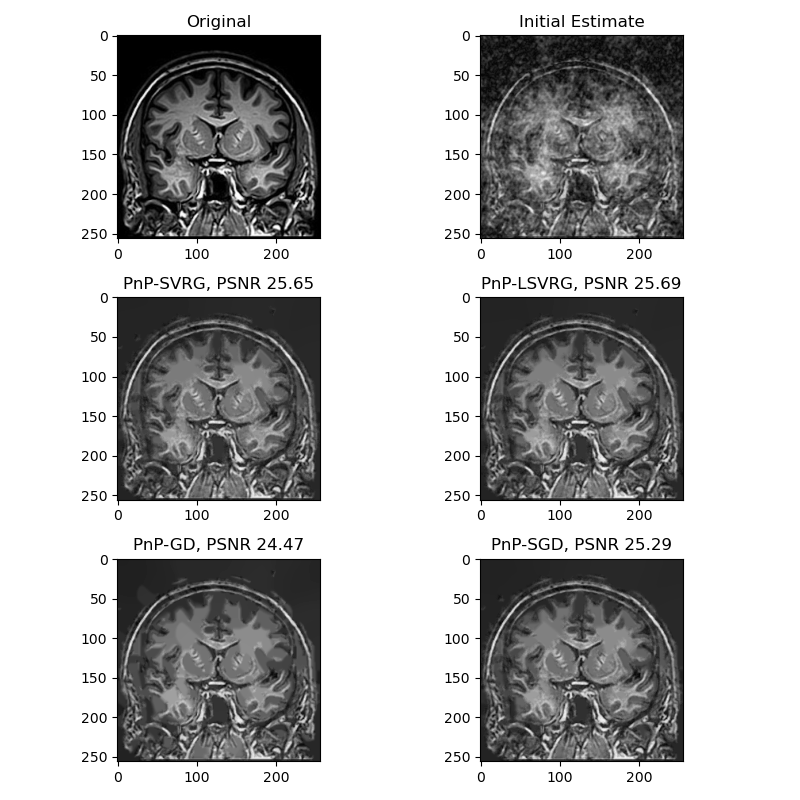

In [11]:
show_grid([torch.Tensor(main_problem['original']), torch.Tensor(main_problem['noisy']), 
           torch.Tensor(z_SVRG), torch.Tensor(z_LSVRG), torch.Tensor(z_GD), torch.Tensor(z_SGD)], ['Original','Initial Estimate',"PnP-SVRG, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SVRG), "PnP-LSVRG, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_LSVRG), "PnP-GD, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_GD), "PnP-SGD, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SGD)], figsize=(8,8))


plt.savefig("./figures/psnr_vs_algo.png")

# show_grid([torch.Tensor(main_problem['original']), torch.Tensor(main_problem['noisy']), torch.Tensor(z_SVRG)], ['Original','Initial Estimate',"PnP-SVRG, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SVRG)], figsize=(8,8))

<IPython.core.display.Javascript object>


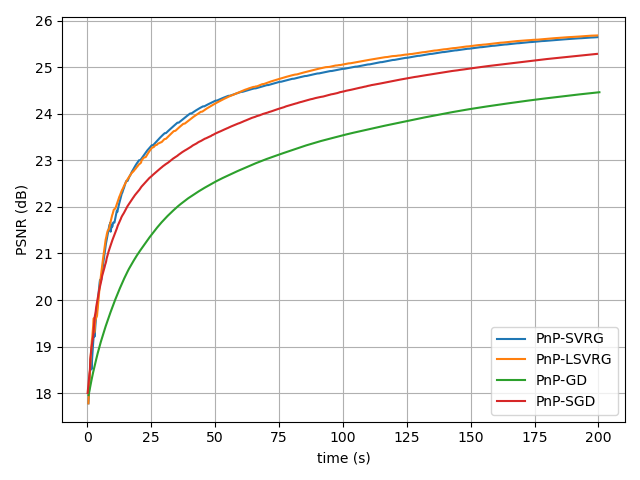

In [12]:
# Figure to display iteration count/ clock time vs PSNR for all algorithms
psnr_fig = plt.figure()
psnr_ax = psnr_fig.add_subplot(1, 1, 1)

psnr_ax.plot(np.cumsum(time_SVRG), psnr_SVRG)
psnr_ax.plot(np.cumsum(time_LSVRG), psnr_LSVRG)
psnr_ax.plot(np.cumsum(time_GD), psnr_GD)
psnr_ax.plot(np.cumsum(time_SGD), psnr_SGD)


psnr_ax.set(xlabel='time (s)', ylabel='PSNR (dB)')
psnr_ax.legend(('PnP-SVRG', 'PnP-LSVRG', 'PnP-GD', 'PnP-SGD'), loc='lower right')
psnr_ax.grid()

psnr_fig.tight_layout()

plt.show()


plt.savefig("./figures/psnr_over_time.png")

In [ ]:
second_problem = create_problem(img_path='./data/Set12/07.png', noise_est=0.8, H=256, W=256, sigma=5)

In [ ]:
z_SVRG, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(second_problem, 'nlm', eta=1750, tt=100, T2=30, mini_batch_size=500, verbose=True)

In [ ]:
z_GD, time_GD, psnr_GD, zs_GD = pnp_gd(second_problem, 'nlm', eta=2000, tt=100, verbose=True)

In [ ]:
z_SGD, time_SGD, psnr_SGD, zs_SGD = pnp_sgd(second_problem, 'nlm', eta=1700, tt=100, mini_batch_size=5000, verbose=True)

In [ ]:
z_LSVRG, time_LSVRG, psnr_LSVRG, zs_LSVRG = pnp_lsvrg(second_problem, 'nlm', eta=1750, tt=100, mini_batch_size=500, prob_update=.04, verbose=True)

In [ ]:
show_grid([torch.Tensor(second_problem['original']), torch.Tensor(second_problem['noisy']), 
           torch.Tensor(z_SVRG), torch.Tensor(z_GD), torch.Tensor(z_SGD), torch.Tensor(z_LSVRG)], ['Original','Initial Estimate',"PnP-SVRG, PSNR %.2f" % peak_signal_noise_ratio(second_problem['original'], z_SVRG), "PnP-GD, PSNR %.2f" % peak_signal_noise_ratio(second_problem['original'], z_GD), "PnP-SGD, PSNR %.2f" % peak_signal_noise_ratio(second_problem['original'], z_SGD), "PnP-LSVRG, PSNR %.2f" % peak_signal_noise_ratio(second_problem['original'], z_LSVRG)], figsize=(8,8))
# show_grid([torch.Tensor(main_problem['original']), torch.Tensor(main_problem['noisy']), torch.Tensor(z_SVRG)], ['Original','Initial Estimate',"PnP-SVRG, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SVRG)], figsize=(8,8))

In [ ]:
# Figure to display iteration count/ clock time vs PSNR for all algorithms
psnr_fig = plt.figure()
psnr_ax = psnr_fig.add_subplot(1, 1, 1)

psnr_ax.plot(np.cumsum(time_SVRG), psnr_SVRG)
psnr_ax.plot(np.cumsum(time_GD), psnr_GD)
psnr_ax.plot(np.cumsum(time_SGD), psnr_SGD)
psnr_ax.plot(np.cumsum(time_LSVRG), psnr_LSVRG)

psnr_ax.set(xlabel='time (s)', ylabel='PSNR (dB)')
psnr_ax.legend(('PnP-SVRG', 'PnP-GD', 'PnP-SGD', 'PnP-LSVRG'), loc='lower right')
psnr_ax.grid()

psnr_fig.tight_layout()

plt.show()

## Figure 3: Compare Image Denoising Routines with PnP-SVRG

In [ ]:
res = create_problem(noise_est=0.8, H=256, W=256, sigma=5, filter_decay=0.999)

In [ ]:
z_SVRG_nlm, time_SVRG_nlm, psnr_SVRG_nlm, zs_SVRG_nlm = pnp_svrg(res, 'nlm', eta=2000, T1=400, T2=5, mini_batch_size=50, verbose=True)

In [ ]:
res = create_problem(noise_est=0.015, H=256, W=256, sigma=5, lr_decay=1, filter_decay=0.999)
z_SVRG_tv, time_SVRG_tv, psnr_SVRG_tv, zs_SVRG_tv = pnp_svrg(res, 'tv', eta=6000, T1=100, T2=5, mini_batch_size=10000, verbose=True)

In [ ]:
res = create_problem(noise_est=0.05, H=256, W=256, sigma=5, filter_decay=0.99)
z_SVRG_bm3d, time_SVRG_bm3d, psnr_SVRG_bm3d, zs_SVRG_bm3d = pnp_svrg(res, 'bm3d', eta=5000, T1=20, T2=5, mini_batch_size=10000, verbose=True)

In [ ]:
res = create_problem(noise_est=0.015, H=256, W=256, sigma=5, filter_decay=0.999)
z_SVRG_cnn, time_SVRG_cnn, psnr_SVRG_cnn, zs_SVRG_cnn = pnp_svrg(res, 'cnn', eta=30e3, T1=3, T2=4, 
                                                   mini_batch_size=int(20e3),
                                                   verbose=True)

In [ ]:
show_grid([torch.Tensor(res['original']), torch.Tensor(res['noisy']), 
           torch.Tensor(z_SVRG_nlm), torch.Tensor(z_SVRG_tv), torch.Tensor(z_SVRG_bm3d), torch.Tensor(z_SVRG_cnn)], ['Original','Initial Estimate',"NLM, PSNR %.2f" % peak_signal_noise_ratio(res['original'], z_SVRG_nlm), "TV, PSNR %.2f" % peak_signal_noise_ratio(res['original'], z_SVRG_tv), "BM3D, PSNR %.2f" % peak_signal_noise_ratio(res['original'], z_SVRG_bm3d), "CNN, PSNR %.2f" % peak_signal_noise_ratio(res['original'], z_SVRG_cnn)], figsize=(8,8))

## Figure 4: Compare Sampling Ratio for each PnP Algorithm

In [ ]:
num_probs = 10
num_trials = 3
sample_probs = np.linspace(.1, 1, num_probs)

prob_vs_psnr_SVRG = []

prob_vs_psnr_GD = []
prob_vs_psnr_SGD = []
prob_vs_psnr_LSVRG = []

for i in range(num_probs):
    samp_ratio_SVRG = []
    samp_ratio_GD = []
    samp_ratio_SGD = []
    samp_ratio_LSVRG = []
    for j in range(num_trials):
        samp_ratio_problem = create_problem(noise_est=0.8, H=256, W=256, sigma=5, filter_decay=0.999, sample_prob=sample_probs[i])
        
        z_SVRG, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(samp_ratio_problem, 'nlm', eta=2000, T1=400, T2=5, mini_batch_size=50, verbose=True)
        samp_ratio_SVRG.append(psnr_SVRG[-1])

        z_GD, time_GD, psnr_GD, zs_GD = pnp_gd(samp_ratio_problem, 'nlm', eta=2000, T=1000, verbose=True)
        samp_ratio_GD.append(psnr_GD[-1])

        z_SGD, time_SGD, psnr_SGD, zs_SGD = pnp_sgd(samp_ratio_problem, 'nlm', eta=2000, T=1000, mini_batch_size=5000, verbose=True)
        samp_ratio_SGD.append(psnr_SGD[-1])

        z_LSVRG, time_LSVRG, psnr_LSVRG, zs_LSVRG = pnp_lsvrg(samp_ratio_problem, 'nlm', eta=1000, T=2000, mini_batch_size=50, prob_update=.2, verbose=True)
        samp_ratio_LSVRG.append(psnr_LSVRG[-1])
    prob_vs_psnr_SVRG.append(np.average(samp_ratio_SVRG))
    prob_vs_psnr_GD.append(np.average(samp_ratio_GD))
    prob_vs_psnr_SGD.append(np.average(samp_ratio_SGD))
    prob_vs_psnr_LSVRG.append(np.average(samp_ratio_LSVRG))
# PLOT CURVES

In [ ]:
# Figure to display iteration count/ clock time vs PSNR for all algorithms
psnr_fig = plt.figure()
psnr_ax = psnr_fig.add_subplot(1, 1, 1)

psnr_ax.plot(sample_probs, prob_vs_psnr_SVRG)
psnr_ax.plot(sample_probs, prob_vs_psnr_LSVRG)
psnr_ax.plot(sample_probs, prob_vs_psnr_GD)
psnr_ax.plot(sample_probs, prob_vs_psnr_SGD)


psnr_ax.set(xlabel='sampling rate (m = p*n)', ylabel='PSNR (dB)')
psnr_ax.legend(('PnP-SVRG', 'PnP-LSVRG', 'PnP-GD', 'PnP-SGD'), loc='lower right')
psnr_ax.grid()

psnr_fig.tight_layout()

plt.show()